In [48]:
# import dependencies
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# declare the file path
filepath = "who_suicide_statistics.csv"

#read in the csv
data = pd.read_csv(filepath)

In [50]:
#create the dataframe
who_stats_df = pd.DataFrame(data)

#sanity check
who_stats_df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [117]:
#groupby age groups
age_stats_df = who_stats_df.groupby(by=["age"]).sum()

#sort the values in descending order
age_stats_df = age_stats_df.sort_values(by="suicides_no", ascending=False)

#sanity check
age_stats_df.head(6)

,year,suicides_no,population
age,,,
35-54 years,14581074,2895388.0,1.745566e+10
55-74 years,14581074,1958468.0,1.065111e+10
25-34 years,14581074,1367333.0,1.059013e+10
15-24 years,14581074,984287.0,1.103601e+10
75+ years,14581074,757667.0,3.112869e+09
5-14 years,14581074,63312.0,1.091554e+10


In [119]:
#save the age groups as a list
ages = list(age_stats_df.index.values)
suicides = list(age_stats_df["suicides_no"].values)

#sanity check
suicides

[2895388.0, 1958468.0, 1367333.0, 984287.0, 757667.0, 63312.0]

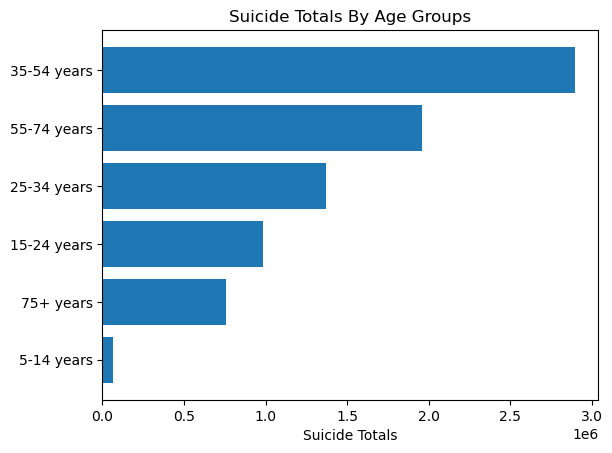

In [120]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(ages))
error = np.random.rand(len(ages))

ax.barh(y_pos, suicides, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(ages)
ax.invert_yaxis()
ax.set_xlabel('Suicide Totals')
ax.set_title('Suicide Totals By Age Groups')

plt.show()